In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
### Visualisation libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime, timedelta,date
import plotly.express as px


In [181]:
import warnings
warnings.filterwarnings('ignore')

In [163]:
ageData = pd.read_csv("AgeGroupDetails.csv")
indiaData = pd.read_csv("covid_19_india.csv")
hospBeds = pd.read_csv("HospitalBedsIndia.csv")
icmrTest = pd.read_csv("ICMRTestingLabs.csv")
indiviDetails = pd.read_csv("IndividualDetails.csv")
population = pd.read_csv("population_india_census2011.csv")
stateData = pd.read_csv("StatewiseTestingDetails.csv")
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
indiaData.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [5]:
indiaData.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [6]:
stateData.head()

Date                        State  TotalSamples Negative  Positive
0  2020-04-17  Andaman and Nicobar Islands        1403.0     1210      12.0
1  2020-04-24  Andaman and Nicobar Islands        2679.0      NaN      27.0
2  2020-04-27  Andaman and Nicobar Islands        2848.0      NaN      33.0
3  2020-05-01  Andaman and Nicobar Islands        3754.0      NaN      33.0
4  2020-05-16  Andaman and Nicobar Islands        6677.0      NaN      33.0

In [7]:
stateData.sort_values('Date',ascending=False)

Date             State  TotalSamples Negative  Positive
5083  2020-09-10       West Bengal     2330283.0      NaN       NaN
272   2020-09-10    Andhra Pradesh     4380991.0  3843304       NaN
1907  2020-09-10  Himachal Pradesh      238427.0   228464       NaN
551   2020-09-10             Assam     2634614.0      NaN       NaN
4105  2020-09-10         Rajasthan     2572191.0  2472374       NaN
...          ...               ...           ...      ...       ...
3791  2020-04-02            Punjab        1434.0      NaN      37.0
861   2020-04-02      Chhattisgarh        1232.0      921       9.0
1137  2020-04-01             Delhi        2621.0      NaN       NaN
2371  2020-04-01            Kerala        7965.0     7256     265.0
4925  2020-04-01       West Bengal         659.0      568      37.0

[5084 rows x 5 columns]

In [8]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/22/20  9/23/20  9/24/20  \
0        0        0        0        0  ...    39096    39145    39170   
1        0        0        0        0  ...    12666    12787    12921   
2        0        0        0        0  ...    50214    50400    50579   
3        0        0        0        0  ...     1681     1753     1753   
4        0        0        0        0  ...     4236     4363     4475   

   9/25/20  9/26/20  9/27/20  9/28/20  9/29/20  9/30/20  10/1/20  
0    39186    39192    39227    39233    39254    39268    39285  
1    13045    13153    13259    13391    13518    13649    13806  
2    50754    50914    51067    51213    51368    51530    51690  
3     1836     1836     1836     1966     1966     2050     2050  
4     4590     4672     4718     4797     4905     4972     5114  

[5 rows x 258 columns]

In [9]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

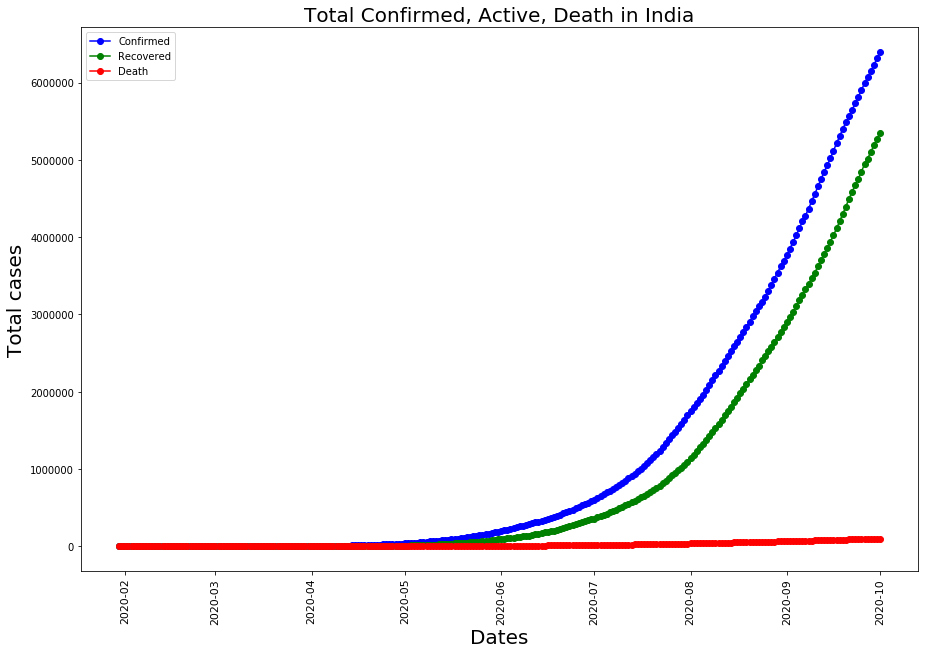

In [10]:
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend();


There's a sttep increase in the cases but we can cleraly see the recoveries are on the rise as well. Let's futhere evaluate data based on specific states and Age groups.

### Age Group Analysis

In [11]:
ageData

Sno AgeGroup  TotalCases Percentage
0    1      0-9          22      3.18%
1    2    10-19          27      3.90%
2    3    20-29         172     24.86%
3    4    30-39         146     21.10%
4    5    40-49         112     16.18%
5    6    50-59          77     11.13%
6    7    60-69          89     12.86%
7    8    70-79          28      4.05%
8    9     >=80          10      1.45%
9   10  Missing           9      1.30%

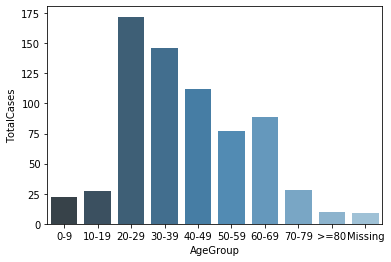

In [12]:
sns.barplot(x='AgeGroup',y='TotalCases',data=ageData,palette='Blues_d')

Suprisingly, age group from 20 to 39 is the most affected. Which is contrary to the initial belief that this virus is not affecting the young population. Maybe this age group is the working population and has to get out of te house. 

### State Wise Analysis

Some pre-processing on the India data, there are a few duplicates (Telangna) and a state by the name of unassigned. 

In [164]:
indiaData['Date'] = pd.to_datetime(indiaData['Date'],dayfirst=True)
indiaData['Date'] = indiaData['Date'].dt.strftime('%m/%d/%Y')

In [165]:
indiaData.drop(indiaData[indiaData['State/UnionTerritory'] == 'Telangana***'].index,inplace = True)
indiaData.drop(indiaData[indiaData['State/UnionTerritory'] == 'Telangana'].index,inplace = True)
indiaData.drop(indiaData[indiaData['State/UnionTerritory'] == 'Telengana***'].index,inplace = True)
indiaData.drop(indiaData[indiaData['State/UnionTerritory'] == 'Unassigned'].index,inplace = True)

In [15]:
state_cases = indiaData.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [16]:
state_cases.head(7)

State/UnionTerritory  Confirmed  Deaths   Cured
0       Andaman and Nicobar Islands       3465      51    3121
1                    Andhra Pradesh     537687    4702  435647
2                 Arunachal Pradesh       5672       9    4005
3                             Assam     135805     414  105701
4                             Bihar     153568     785  137544
5  Cases being reassigned to states       9265       0       0
6                        Chandigarh       6987      83    4331

In [17]:
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths'] + state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(((state_cases["Deaths"]/state_cases["Confirmed"])*100),2)
state_cases["Cure Rate (per 100)"] = np.round(((state_cases["Cured"]/state_cases["Confirmed"])*100),2)
state_cases.head(7)

State/UnionTerritory  Confirmed  Deaths   Cured  Active  \
0       Andaman and Nicobar Islands       3465      51    3121     293   
1                    Andhra Pradesh     537687    4702  435647   97338   
2                 Arunachal Pradesh       5672       9    4005    1658   
3                             Assam     135805     414  105701   29690   
4                             Bihar     153568     785  137544   15239   
5  Cases being reassigned to states       9265       0       0    9265   
6                        Chandigarh       6987      83    4331    2573   

   Death Rate (per 100)  Cure Rate (per 100)  
0                  1.47                90.07  
1                  0.87                81.02  
2                  0.16                70.61  
3                  0.30                77.83  
4                  0.51                89.57  
5                  0.00                 0.00  
6                  1.19                61.99

In [18]:
state_cases.sort_values('Confirmed',ascending=False).fillna(0).style.background_gradient(cmap='Blues')

In [19]:
indiaData.head(25)

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0     1  01/30/2020  6:00 PM               Kerala                       1   
1     2  01/31/2020  6:00 PM               Kerala                       1   
2     3  02/01/2020  6:00 PM               Kerala                       2   
3     4  02/02/2020  6:00 PM               Kerala                       3   
4     5  02/03/2020  6:00 PM               Kerala                       3   
5     6  02/04/2020  6:00 PM               Kerala                       3   
6     7  02/05/2020  6:00 PM               Kerala                       3   
7     8  02/06/2020  6:00 PM               Kerala                       3   
8     9  02/07/2020  6:00 PM               Kerala                       3   
9    10  02/08/2020  6:00 PM               Kerala                       3   
10   11  02/09/2020  6:00 PM               Kerala                       3   
11   12  02/10/2020  6:00 PM               Kerala                       3   
12   13  02/11/2020  6:00 PM               Kerala                       3   
13   14  02/12/2020  6:00 PM               Kerala                       3   
14   15  02/13/2020  6:00 PM               Kerala                       3   
15   16  02/14/2020  6:00 PM               Kerala                       3   
16   17  02/15/2020  6:00 PM               Kerala                       3   
17   18  02/16/2020  6:00 PM               Kerala                       3   
18   19  02/17/2020  6:00 PM               Kerala                       3   
19   20  02/18/2020  6:00 PM               Kerala                       3   
20   21  02/19/2020  6:00 PM               Kerala                       3   
21   22  02/20/2020  6:00 PM               Kerala                       3   
22   23  02/21/2020  6:00 PM               Kerala                       3   
23   24  02/22/2020  6:00 PM               Kerala                       3   
24   25  02/23/2020  6:00 PM               Kerala                       3   

   ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                         0      0       0          1  
1                         0      0       0          1  
2                         0      0       0          2  
3                         0      0       0          3  
4                         0      0       0          3  
5                         0      0       0          3  
6                         0      0       0          3  
7                         0      0       0          3  
8                         0      0       0          3  
9                         0      0       0          3  
10                        0      0       0          3  
11                        0      0       0          3  
12                        0      0       0          3  
13                        0      0       0          3  
14                        0      0       0          3  
15                        0      0       0          3  
16                        0      0       0          3  
17                        0      0       0          3  
18                        0      0       0          3  
19                        0      0       0          3  
20                        0      0       0          3  
21                        0      0       0          3  
22                        0      0       0          3  
23                        0      0       0          3  
24                        0      0       0          3

India's covid cases clearly started from Kerala.

In [21]:
temp.head(25)

State/UnionTerritory  Confirmed  Deaths   Cured  Active  \
0           Maharashtra     990795   28282  700715  261798   
1        Andhra Pradesh     537687    4702  435647   97338   
2            Tamil Nadu     486052    8154  429416   48482   
3             Karnataka     430947    6937  322454  101556   
4         Uttar Pradesh     292029    4206  221506   66317   
5                 Delhi     205482    4666  175400   25416   
6           West Bengal     193175    3771  166027   23377   
7                 Bihar     153568     785  137544   15239   
8             Telengana     152602     940  119467   32195   
9                Odisha     139121     591  108001   30529   
10                Assam     135805     414  105701   29690   
11              Gujarat     109465    3164   90103   16198   
12               Kerala      99266     396   72578   26292   
13            Rajasthan      97376    1192   80482   15702   
14              Haryana      85944     907   66705   18332   
15       Madhya Pradesh      81379    1661   61285   18433   
16               Punjab      72143    2149   51906   18088   
17            Jharkhand      58079     517   42115   15447   
18         Chhattisgarh      55680     493   25855   29332   
19            Telangana      54059     463   41332   12264   

    Death Rate (per 100)  Cure Rate (per 100)  
0                   2.85                70.72  
1                   0.87                81.02  
2                   1.68                88.35  
3                   1.61                74.82  
4                   1.44                75.85  
5                   2.27                85.36  
6                   1.95                85.95  
7                   0.51                89.57  
8                   0.62                78.29  
9                   0.42                77.63  
10                  0.30                77.83  
11                  2.89                82.31  
12                  0.40                73.11  
13                  1.22                82.65  
14                  1.06                77.61  
15                  2.04                75.31  
16                  2.98                71.95  
17                  0.89                72.51  
18                  0.89                46.43  
19                  0.86                76.46

In [22]:
temp1 = state_cases.sort_values(by = 'Confirmed',ascending= False)[0:20]
temp1.reset_index(inplace = True,drop = True)


plt.figure(figsize= (20,15))
fig2 = px.bar(data_frame=temp, x = temp1['State/UnionTerritory'], y=temp1['Confirmed'],
            color_continuous_scale= px.colors.sequential.PuBu, color = 'Confirmed',
            text='Confirmed',template = 'plotly_white',
            labels = {'State/UnionTerritory':'State','Confirmed':'Confirmed Cases '},
            hover_name = 'State/UnionTerritory',
            hover_data = {'Confirmed':True,'State/UnionTerritory':False}, )

fig2.update_layout(title = {
    'text' : 'Top 20 States by Confirmed Cases',
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    xaxis_title = '')

fig2.update_traces(texttemplate = '%{text:.2s}',textposition = 'outside',textfont_size =18)

fig2.show()

<Figure size 1440x1080 with 0 Axes>

Kerala, was one of the fist states to report the cases but they have managed to keep the numbers well below other states. Maybe it's due to better health facilties or better implementaiton of the lockdown. 

In [23]:
temp2 = state_cases.sort_values(by = 'Confirmed',ascending= False)[0:20]
temp2.reset_index(inplace = True,drop = True)
temp2['%Cured'] = round((temp['Cured']/temp['Confirmed'])*100,2)
temp2 = temp2.sort_values(by='Confirmed',ascending=False)

plt.figure(figsize= (20,15))
fig3 = px.bar(data_frame=temp2, x = temp2['State/UnionTerritory'], y=temp2['Confirmed'],
            color_continuous_scale= px.colors.sequential.Darkmint, color = '%Cured',
            text='Confirmed',template = 'plotly_white',
            labels = {'State/UnionTerritory':'State','%Cured':'%Cured'},
            hover_name = 'State/UnionTerritory',
            hover_data = {'%Cured':True,'Confirmed':True,'State/UnionTerritory':False}, )

fig3.update_layout(title = {
    'text' : 'Percentage cured to confirmed cases',
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    xaxis_title = '')

fig3.update_traces(texttemplate = '%{text:.2s}',textposition = 'outside',textfont_size =18)

fig3.show();

<Figure size 1440x1080 with 0 Axes>

Bihar, has the highest cure percentage of 89%, followed by Tamil Nadu, they seem to be doing a good job in stopping the contamination and the treatment. Maharashtra, has the highest number of cases and a cure percentage of 70% We need to further lookinto the healt facilities of the different states as well as the numbers of tests conducted. 

In [24]:
hospBeds.head()

Sno                   State/UT NumPrimaryHealthCenters_HMIS  \
0    1  Andaman & Nicobar Islands                           27   
1    2             Andhra Pradesh                         1417   
2    3          Arunachal Pradesh                          122   
3    4                      Assam                         1007   
4    5                      Bihar                         2007   

   NumCommunityHealthCenters_HMIS  NumSubDistrictHospitals_HMIS  \
0                               4                           NaN   
1                             198                          31.0   
2                              62                           NaN   
3                             166                          14.0   
4                              63                          33.0   

   NumDistrictHospitals_HMIS  TotalPublicHealthFacilities_HMIS  \
0                          3                                34   
1                         20                              1666   
2                         15                               199   
3                         33                              1220   
4                         43                              2146   

   NumPublicBeds_HMIS  NumRuralHospitals_NHP18  NumRuralBeds_NHP18  \
0                1246                       27                 575   
1               60799                      193                6480   
2                2320                      208                2136   
3               19115                     1176               10944   
4               17796                      930                6083   

   NumUrbanHospitals_NHP18  NumUrbanBeds_NHP18  
0                        3                 500  
1                       65               16658  
2                       10                 268  
3                       50                6198  
4                      103                5936

In [25]:
hospBeds['TotalBeds'] = hospBeds['NumPublicBeds_HMIS'] + hospBeds['NumRuralBeds_NHP18'] + hospBeds['NumUrbanBeds_NHP18']

In [73]:
stateBeds = hospBeds.groupby('State/UT')
stateBeds = stateBeds.apply(pd.DataFrame)
stateBeds = stateBeds.sort_values('TotalBeds',ascending=False)[0:10]
stateBeds.reset_index(inplace = True,drop = True)

In [82]:
stateBeds.drop(stateBeds[stateBeds['State/UT'] == 'All India'].index,inplace = True)

In [105]:
plt.figure(figsize= (20,15))
fig4 = px.bar(data_frame=stateBeds, x = stateBeds['TotalBeds'], y=stateBeds['State/UT'],
            template = 'plotly_white')

fig4.update_layout(title = 
    {'text' : 'Top 10 States with Heighest Bed Count',
    'y':0.95,
    'x':0.5,})

fig4.show();
            

<Figure size 1440x1080 with 0 Axes>

In [84]:
icmrTest

lab  \
0    ICMR-Regional Medical Research Centre, Port Blair   
1    Tomo Riba Institute of Health & Medical Scienc...   
2    Sri Venkateswara Institute of Medical Sciences...   
3                  Rangaraya Medical College, Kakinada   
4                 Sidhartha Medical College, Vijaywada   
..                                                 ...   
262                       Tata Medical Center, Kolkata   
263  Laboratory Services, Peerless Hospitex Hospita...   
264  AMRI Hospitals, Department of Laboratory Medic...   
265            Suraksha Diagnostics Pvt. Ltd., Kolkata   
266  Dr. Lal PathLabs Ltd, Reference Laboratory, Ko...   

                                               address  pincode        city  \
0    ICMR-Regional Medical Research Centre, Post Ba...   744103  Port Blair   
1    National Highway 52A, Old Assembly Complex, Na...   791110  Naharlagun   
2    Sri Venkateswara Institute of Medical Sciences...   517507    Tirupati   
3    Rangaraya Medical College, Kakinada Pithampura...   533001    Kakinada   
4    Siddhartha Medical College, Vijayawada NH 16 S...   520008  Vijayawada   
..                                                 ...      ...         ...   
262  Department of Laboratory Sciences, Tata Medica...   700160     Kolkata   
263  Laboratory Services, Peerless Hospitex Hospita...   700094     Kolkata   
264  AMRI Hospitals, Department of Laboratory Medic...   700098     Kolkata   
265  Suraksha Diagnostics Pvt. Ltd., 12/1, Premises...   700156     Kolkata   
266  Dr. Lal PathLabs Ltd, Reference Laboratory, Pl...   700156     Kolkata   

                           state                   type  
0    Andaman and Nicobar Islands  Government Laboratory  
1              Arunachal Pradesh        Collection Site  
2                 Andhra Pradesh  Government Laboratory  
3                 Andhra Pradesh  Government Laboratory  
4                 Andhra Pradesh  Government Laboratory  
..                           ...                    ...  
262                  West Bengal     Private Laboratory  
263                  West Bengal     Private Laboratory  
264                  West Bengal     Private Laboratory  
265                  West Bengal     Private Laboratory  
266                  West Bengal     Private Laboratory  

[267 rows x 6 columns]

In [88]:
labs = icmrTest.groupby('state')['type'].count().reset_index()

In [95]:
labs = labs.sort_values('type',ascending=False)[0:10]
labs.reset_index(inplace = True,drop = True)

In [106]:
plt.figure(figsize= (20,15))
fig5 = px.bar(data_frame=labs, x = labs['type'], y=labs['state'],
            template = 'plotly_white',text = 'type',
            labels = {'state':'State','type':'Total Labs'})
fig5.update_layout(title = 
    {'text' : 'Top 10 States with Heighest Lab Count',
    'y':0.95,
    'x':0.5,})

fig5.show();
            

<Figure size 1440x1080 with 0 Axes>

In [131]:
latest_tests = stateData.groupby('State').sum()

In [135]:
latest_tests=latest_tests.sort_values('TotalSamples',ascending = False)[0:20]
latest_tests['Ratio'] = round((latest_tests['Positive']/latest_tests['TotalSamples'])*1000,2)

fig = px.bar(data_frame = latest_tests,
             y  = latest_tests['TotalSamples'],x =  latest_tests['TotalSamples'].index,template = 'ggplot2',text = latest_tests['Ratio'],
             color = latest_tests['Ratio'],color_continuous_scale= px.colors.sequential.Darkmint,
             labels = {'TotalSamples':'Number of COVID Tests Done',"Ratio":'Positive Cases for every 1000 tests'},
             hover_name = latest_tests['TotalSamples'].index
             )

fig.update_layout(title = {
    'text': 'COVID Tests Done vs Positive Cases for Every 1000 tests'
})
fig.update_traces(textposition = 'outside',textfont_size = 13)

This graph shows an interesting figure, Uttar Pradesh and Tamil Nadu has lower number of testing labs but are performing more tests that Maharahstra. Maharashtra, however has the highetst number of positive cases per 1000 and seems to be the worst performing state. 

In [166]:
indiaData['Date'] = pd.to_datetime(indiaData['Date'])
latest = indiaData[indiaData["Date"] > pd.to_datetime('2020-04-01')]

latest2 = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured',"Date"].max().reset_index()

latest2['Active'] = latest2['Confirmed'] - (latest2['Deaths'] - latest2['Cured'])

state_list = list(latest2.sort_values('Active',ascending = False)['State/UnionTerritory'])[0:15]

states_dates = {}

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



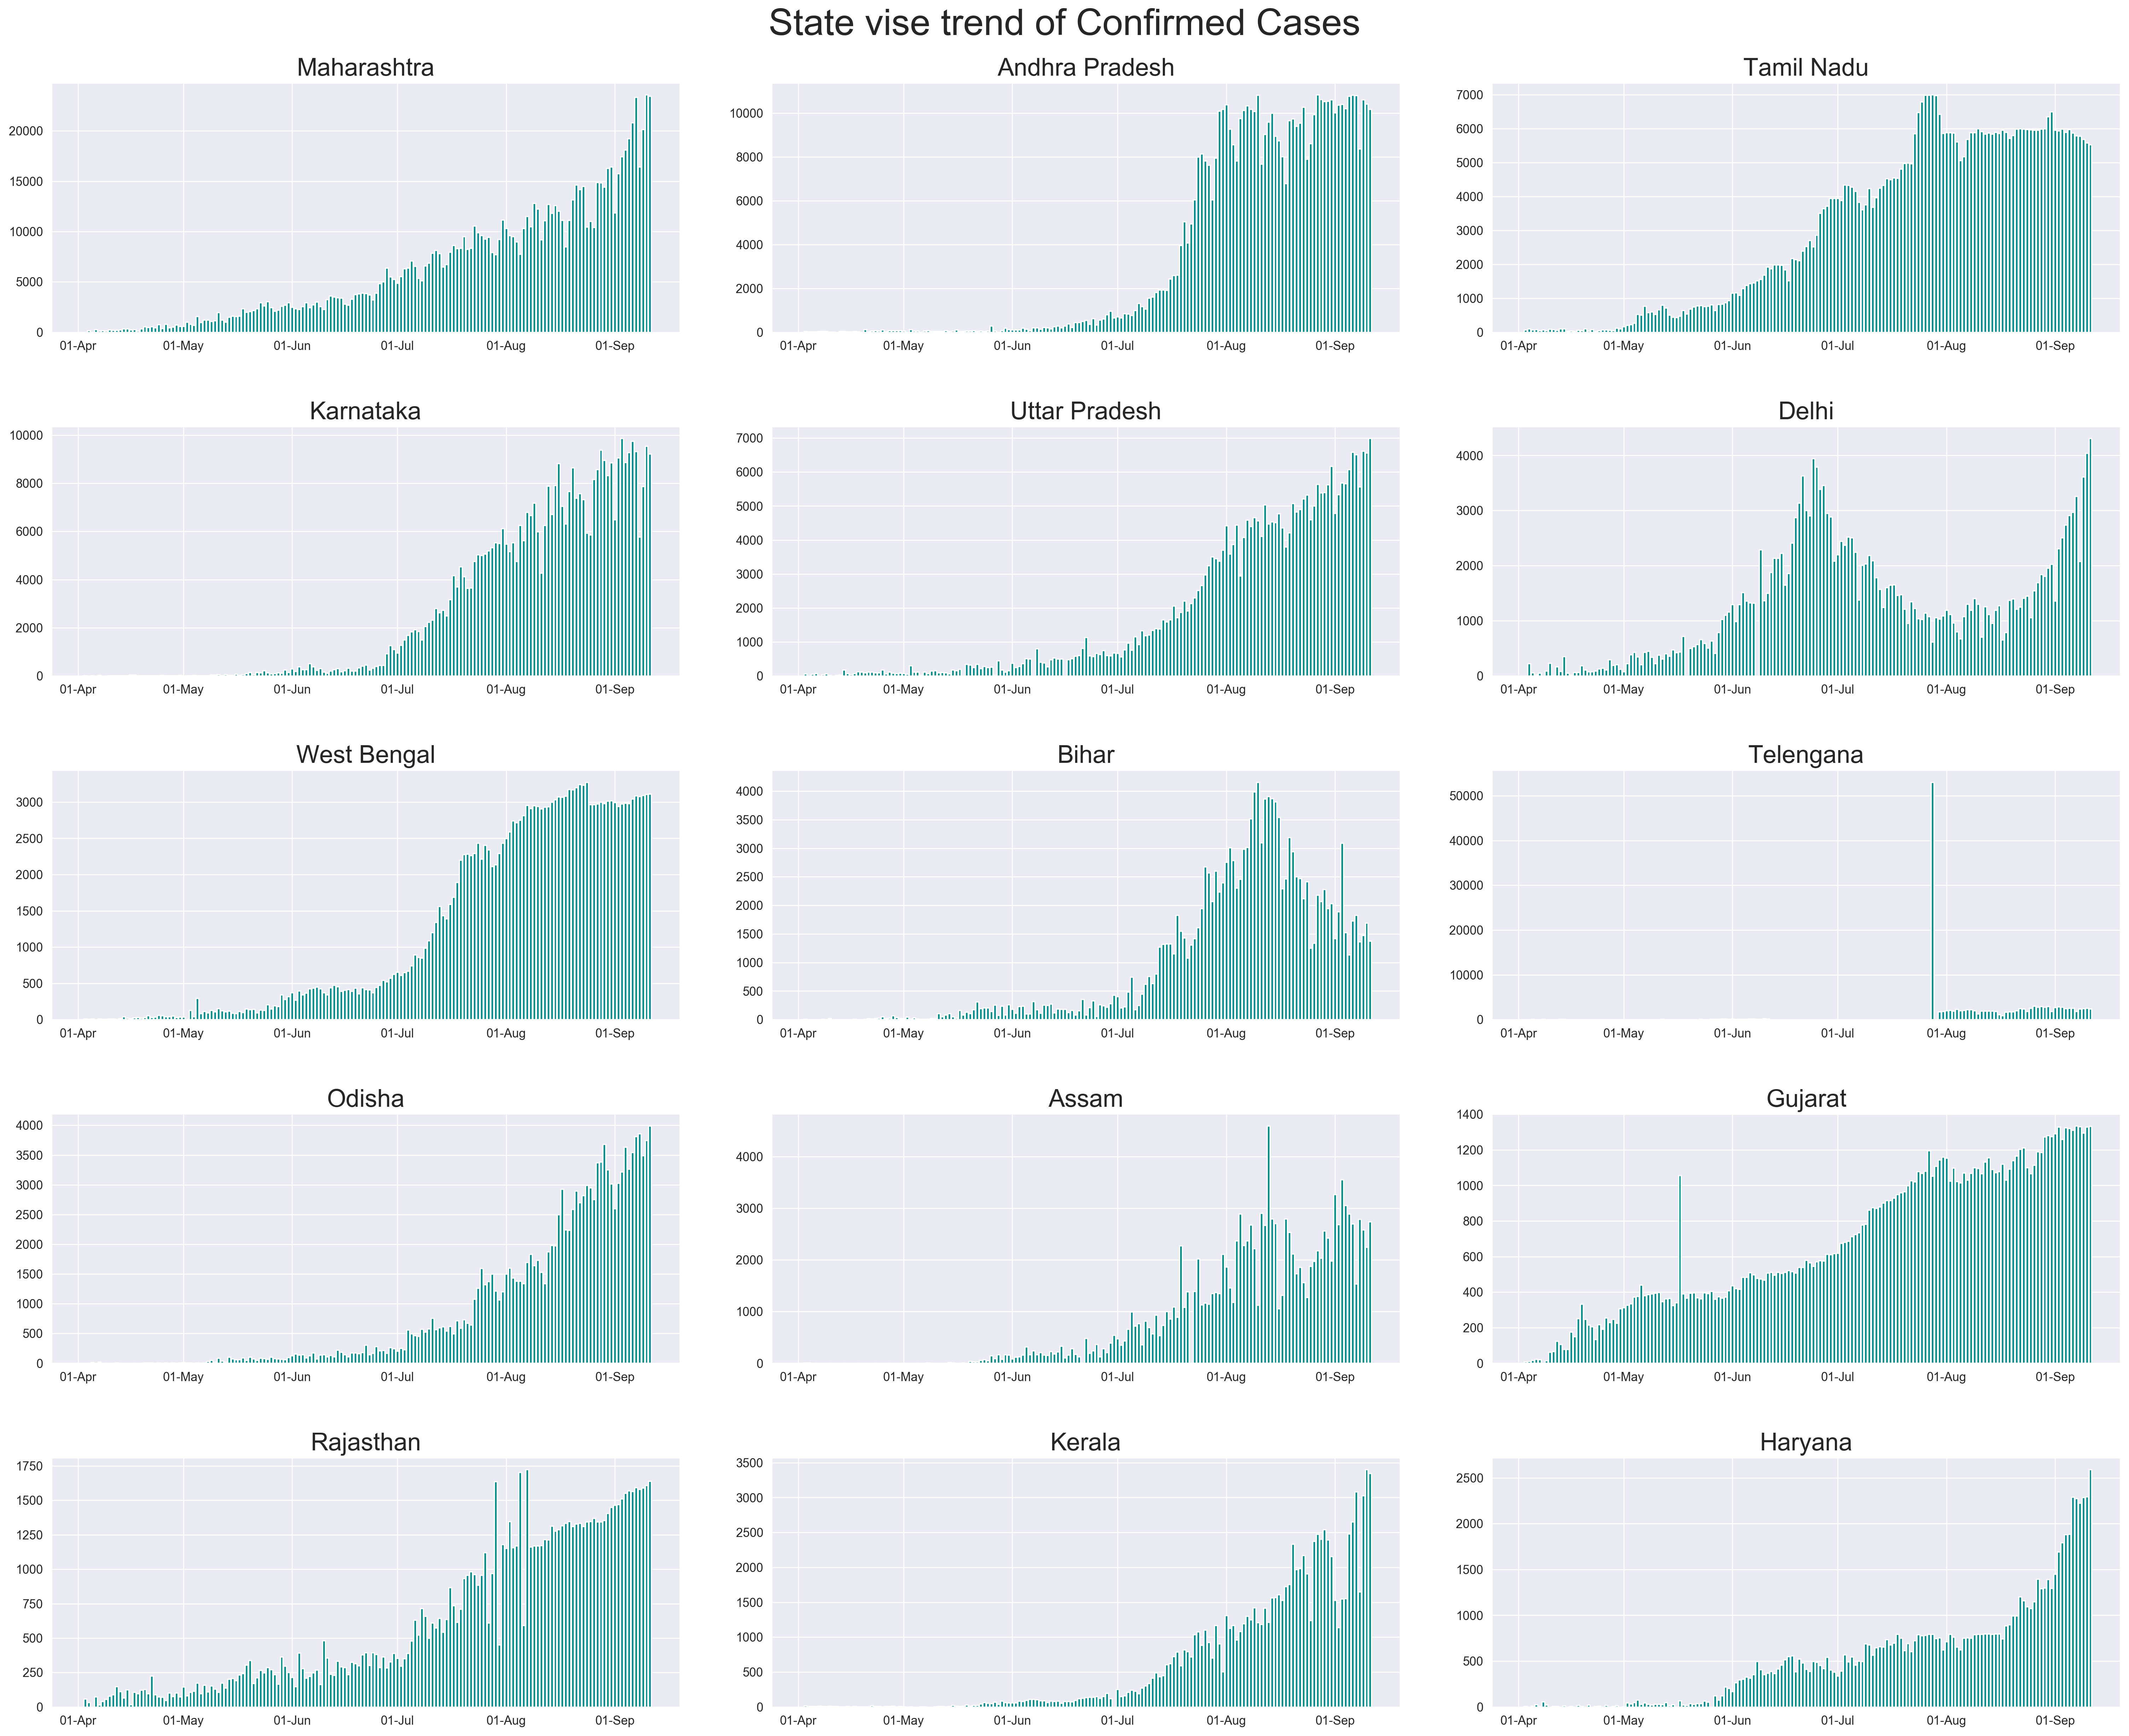

In [175]:
fig = plt.figure(figsize=(25,20),dpi = 250)

axno = 1
sns.set_style('darkgrid')

for state in state_list:
    df1 = latest[latest['State/UnionTerritory'] == state].reset_index(drop = True)
    new_cases = [0]
    state_dates = latest[latest['State/UnionTerritory'] == state]['Date']
    
    for i in range (1,len(df1)):
        cases_delta = (df1['Confirmed'][i] - df1['Confirmed'][i-1])
        new_cases.append(cases_delta)

    df1['New Cases'] = new_cases
    ax = fig.add_subplot(5,3,axno)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(state_dates.values,df1['New Cases'], label = 'Day wise confirmed cases',color = 'darkcyan')
    plt.title(state,fontsize = 20)
    axno = axno + 1

plt.suptitle('State vise trend of Confirmed Cases',fontsize = 30,y=1.0)
plt.tight_layout(pad = 4.0)
plt.savefig("State")


Some findings:

Bihar is showing a downward trend even though a lot of people left Maharahstra and entered Bihar when the lockdown was announced. Maybe Bihar needs to condunct more tests.

Delhi had a drop in cases between July to August, it seems since the lockdown was lifted people are not following the social distancing protocols.





### Prediction

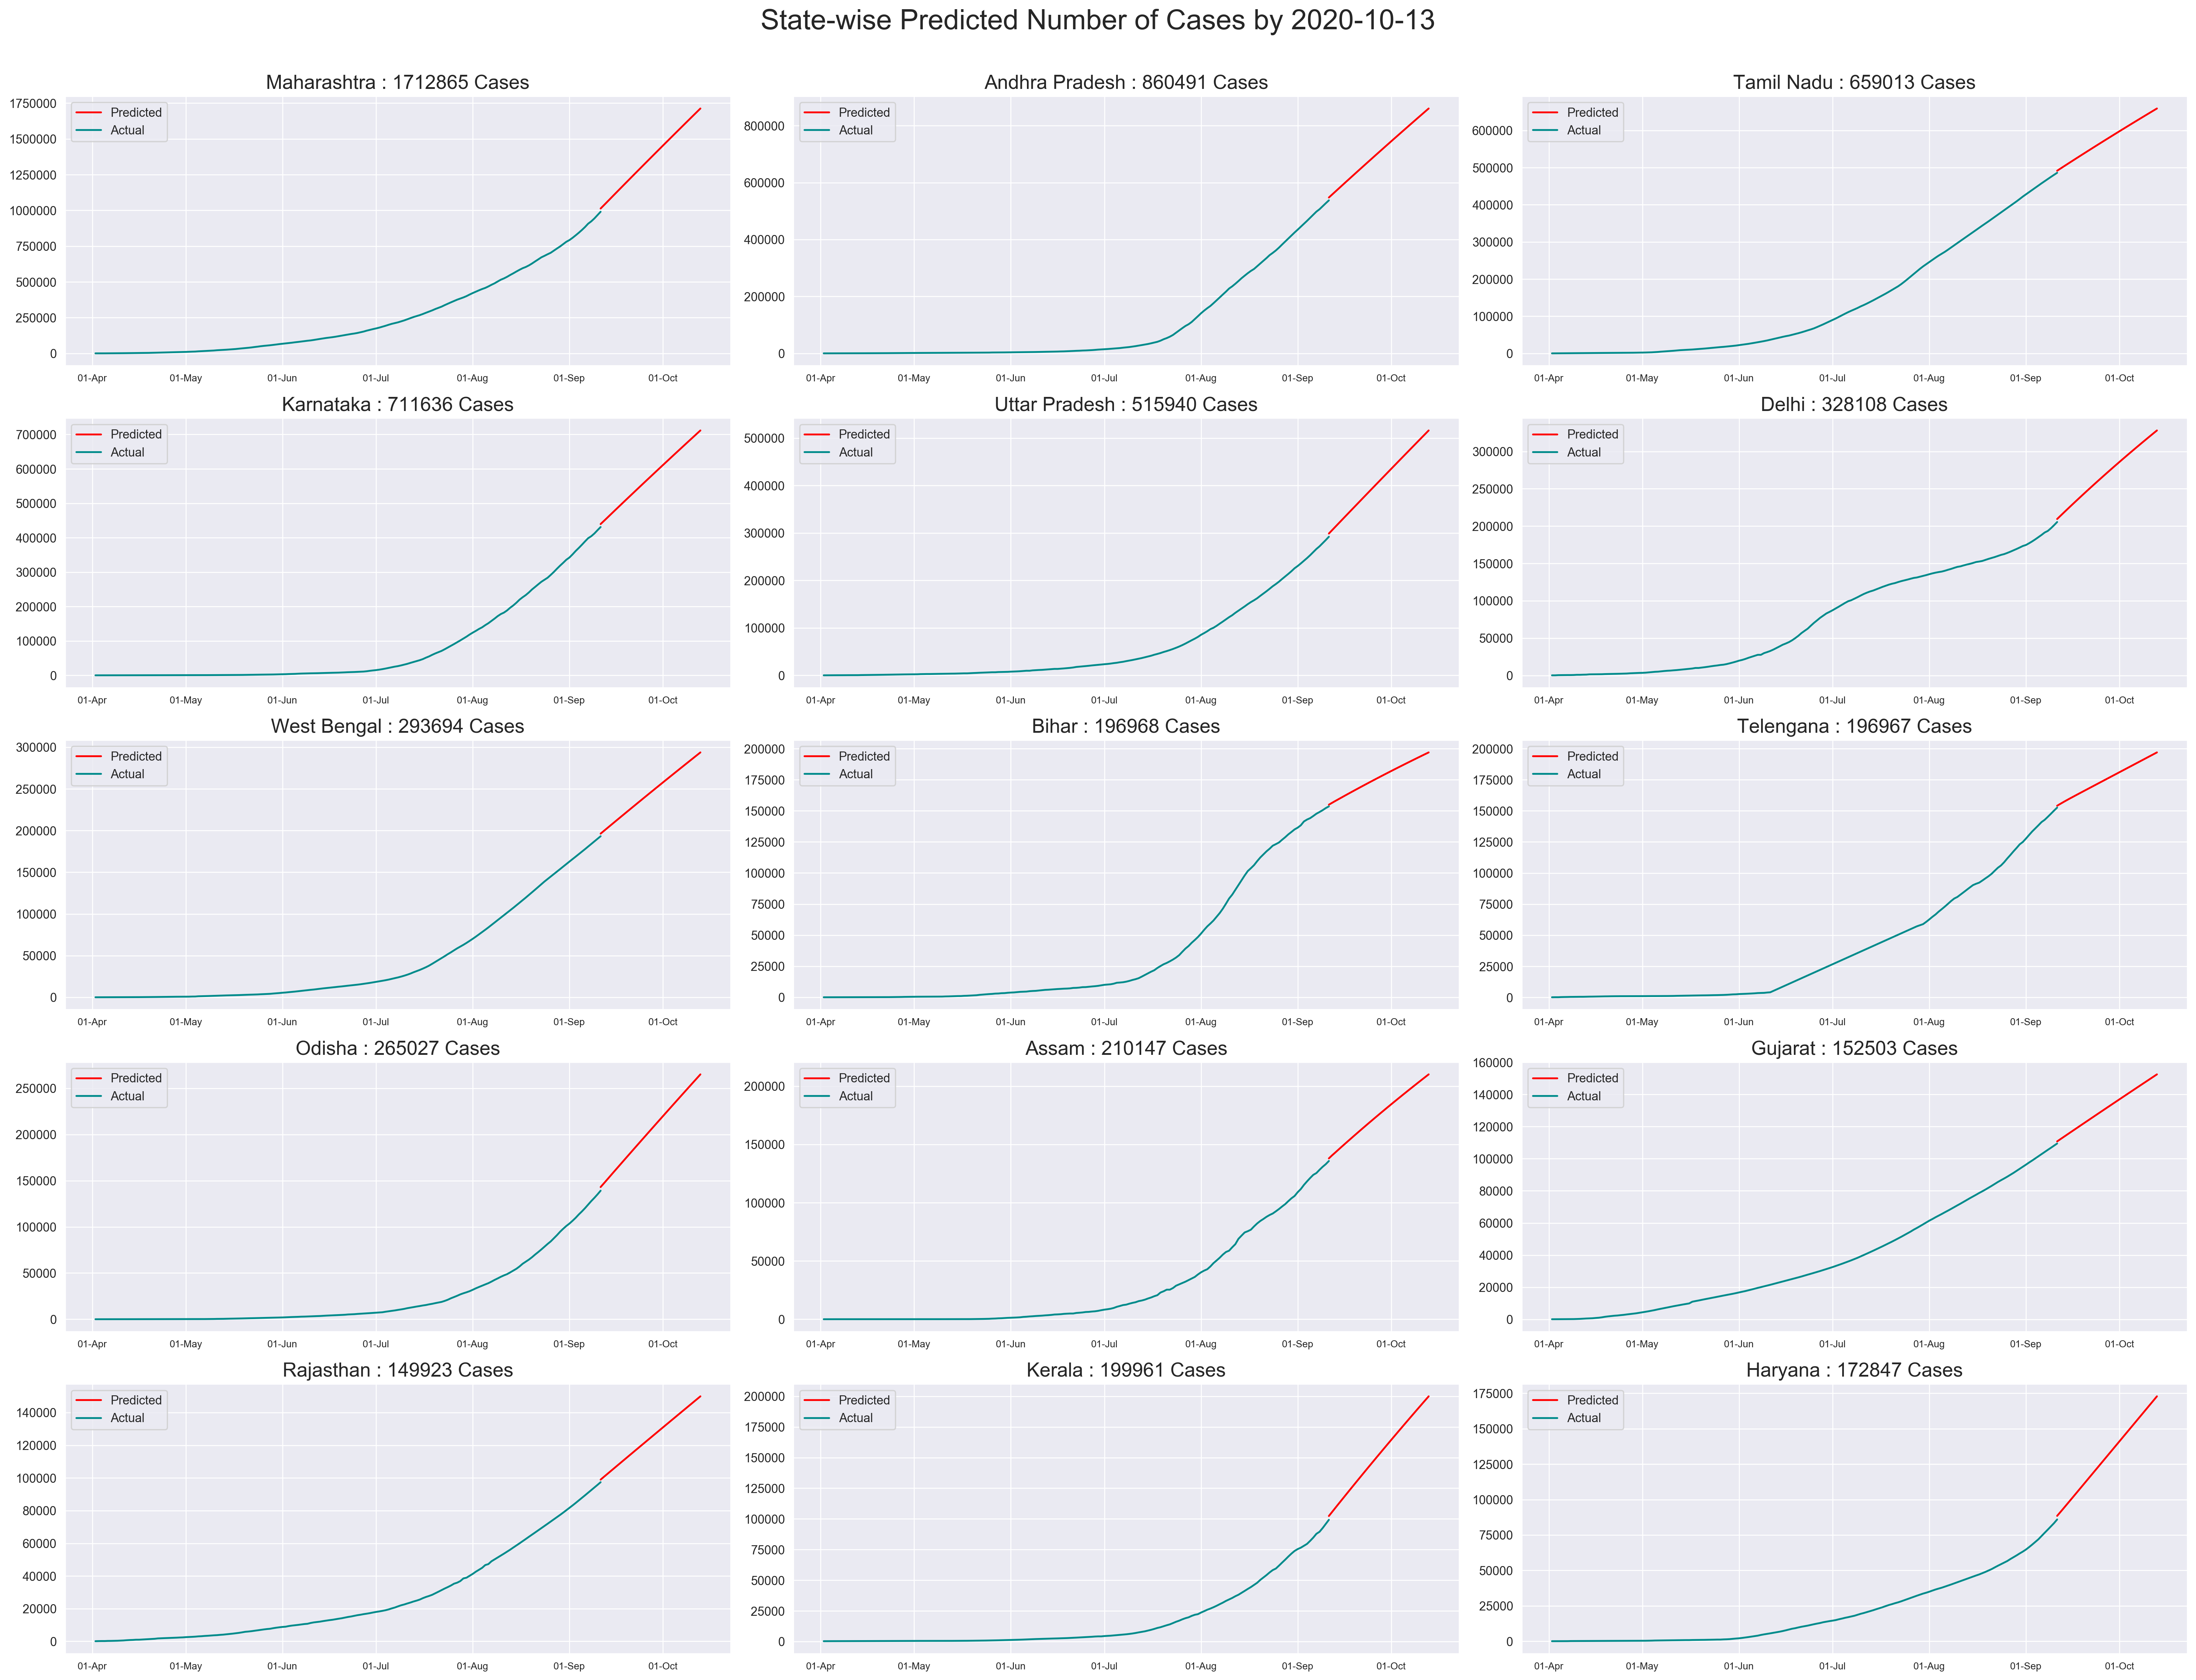

In [182]:
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA


fig = plt.figure(figsize=(25,20),dpi = 250)
subplotno = 1

for state in state_list:
    
     
    state_df = latest[latest['State/UnionTerritory'] == state]
    y = state_df['Confirmed']
    
    arima = ARIMA(y, order=(5, 1, 0))
    arima = arima.fit(trend='c', full_output=True, disp=True)
    forecast = arima.forecast(steps= 33)
    pred = list(forecast[0])

    start_date = state_df['Date'].max()

    prediction_dates = [pd.to_datetime(start_date)]

    for i in range(32):
        
        tempdate = start_date + timedelta(days=1)
        prediction_dates.append(tempdate)
        start_date = tempdate
    
    ax = fig.add_subplot(5,3,subplotno)
    
    plt.title(state + ' : ' + str(int(round(pred[-1],0))) + ' Cases' , fontsize = 16)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    plt.xticks(fontsize = 8)
    
    sns.lineplot(y= pred,x= prediction_dates,linestyle ='dashed',label = 'Predicted',color = 'red')
    sns.lineplot(y=state_df['Confirmed'] , x = state_df['Date'] ,color = 'darkcyan',label = 'Actual')
    plt.legend()
    

    plt.ylabel('')
    plt.xlabel('')

    subplotno +=1

plt.suptitle('State-wise Predicted Number of Cases by '+str(prediction_dates[-1].date()) ,fontsize = 23)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Statepred - ARIMA')
